In [110]:
import numpy as np
import pandas as pd
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses 
from keras import metrics
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

In [111]:
data = pd.read_csv('input\PhisingWebsite_datset.csv')

In [112]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [113]:
data.ndim

2

In [114]:
data.shape

(11055, 31)

In [115]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [116]:
data.groupby('Result').describe()

Abnormal_URL                                              DNSRecord  \
              count      mean       std  min  25%  50%  75%  max     count   
Result                                                                       
-1           4898.0  0.753369  0.657665 -1.0  1.0  1.0  1.0  1.0    4898.0   
 1           6157.0  0.667046  0.745077 -1.0  1.0  1.0  1.0  1.0    6157.0   

                 ...  port      web_traffic                                \
            mean ...   75%  max       count      mean       std  min  25%   
Result           ...                                                        
-1      0.298489 ...   1.0  1.0      4898.0 -0.033891  0.805126 -1.0 -1.0   
 1      0.439662 ...   1.0  1.0      6157.0  0.542797  0.753158 -1.0  0.0   

                       
        50%  75%  max  
Result                 
-1      0.0  1.0  1.0  
 1      1.0  1.0  1.0  

[2 rows x 240 columns]

In [117]:
data.Result.replace([-1 , 1 ], [0 , 1],inplace =True)

In [118]:
type(data)

pandas.core.frame.DataFrame

In [119]:
pd.isnull(data).sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [120]:
pd.isna(data).sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [121]:
x = data.drop('Result',axis =1)
y = data['Result']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [122]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7738, 30) (7738,) (3317, 30) (3317,)


In [123]:
type(x_train)

pandas.core.frame.DataFrame

In [124]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [125]:
type(y_train)

pandas.core.frame.DataFrame

In [126]:
type(y_test)

pandas.core.frame.DataFrame

In [127]:
x_train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
5576,-1,-1,1,1,1,-1,0,1,1,1,...,1,1,1,-1,1,1,-1,1,1,1
167,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
6158,-1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,-1,1,-1,1,1,1,-1
2173,-1,-1,-1,1,-1,-1,-1,1,-1,1,...,1,1,1,1,-1,1,-1,1,1,1
4010,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,1,-1,1,-1,1


In [128]:
y_train.head()

,Result
5576,1
167,1
6158,0
2173,1
4010,0


In [129]:
train_data = pd.concat([x_train, y_train], axis=1, join='inner')
test_data = pd.concat([x_test, y_test], axis=1, join='inner')

In [130]:
train_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
5576,-1,-1,1,1,1,-1,0,1,1,1,...,1,1,-1,1,1,-1,1,1,1,1
167,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
6158,-1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,-1,1,-1,1,1,1,-1,0
2173,-1,-1,-1,1,-1,-1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,1
4010,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,-1,1,-1,1,0


In [131]:
test_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
6430,1,1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
4175,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,0
5586,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,-1,1,1,1,1,0,-1,1
4592,1,-1,1,1,1,1,-1,1,1,1,...,1,1,-1,-1,1,1,1,0,1,1


In [132]:
train_data.to_csv('output/train.csv',index_label='Index')
test_data.to_csv('output/test.csv',index_label='Index')

In [133]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7738, 30) (7738, 1) (3317, 30) (3317, 1)


In [134]:
train_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,...,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,0.313776,-0.636986,0.740243,0.703024,0.742311,-0.732489,0.062548,0.251874,-0.326958,0.631429,...,0.617214,0.822952,0.067459,0.380460,0.292065,-0.485914,0.723960,0.349574,0.723960,0.559318
std,0.949558,0.762581,0.672383,0.711212,0.670099,0.680823,0.819004,0.911213,0.945100,0.775484,...,0.786846,0.568148,0.997787,0.924857,0.828122,0.874063,0.689887,0.572675,0.689887,0.496501
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
test_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,...,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000
mean,0.313838,-0.624359,0.735303,0.694905,0.739524,-0.740730,0.067229,0.248719,-0.359662,0.621948,...,0.604462,0.802834,0.046729,0.369310,0.276153,-0.478444,0.716008,0.331022,0.709376,0.551402
std,0.949620,0.774276,0.677841,0.719210,0.673232,0.671905,0.814155,0.913610,0.933223,0.783177,...,0.796754,0.596293,0.999058,0.929447,0.826842,0.878250,0.698197,0.563393,0.704937,0.497426
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
x_train.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [137]:
y_train.dtypes

Result    int64
dtype: object

In [138]:
y_train.head(10)

,Result
5576,1
167,1
6158,0
2173,1
4010,0
7819,1
7549,1
3242,1
5723,1
8053,1


In [139]:
y_test.head(10)

,Result
6430,1
11048,1
4175,0
5586,1
4592,1
1026,1
2318,1
5309,1
2420,0
1890,0


In [140]:
test_data.groupby('Result').describe()

Abnormal_URL                                              DNSRecord  \
              count      mean       std  min  25%  50%  75%  max     count   
Result                                                                       
0            1488.0  0.737903  0.675133 -1.0  1.0  1.0  1.0  1.0    1488.0   
1            1829.0  0.669765  0.742776 -1.0  1.0  1.0  1.0  1.0    1829.0   

                 ...  port      web_traffic                                \
            mean ...   75%  max       count      mean       std  min  25%   
Result           ...                                                        
0       0.279570 ...   1.0  1.0      1488.0 -0.051075  0.795126 -1.0 -1.0   
1       0.442318 ...   1.0  1.0      1829.0  0.542373  0.753535 -1.0  0.0   

                       
        50%  75%  max  
Result                 
0       0.0  1.0  1.0  
1       1.0  1.0  1.0  

[2 rows x 240 columns]

In [141]:
model =Sequential()

In [142]:
model.add(Dense(32, kernel_initializer="uniform", input_dim =30, activation='relu'))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, kernel_initializer="uniform", activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,  kernel_initializer="uniform", activation='relu'))
model.add(Dense(1, kernel_initializer="uniform", activation='sigmoid'))

In [143]:
model.compile(
    optimizer=keras.optimizers.Adam(lr =0.001),
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

In [144]:
model.fit(
    x_train,
    y_train,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose = 2
)

Train on 7738 samples, validate on 3317 samples
Epoch 1/30
 - 3s - loss: 0.4478 - acc: 0.7758 - val_loss: 0.2160 - val_acc: 0.9180
Epoch 2/30
 - 1s - loss: 0.2354 - acc: 0.9205 - val_loss: 0.1948 - val_acc: 0.9240
Epoch 3/30
 - 1s - loss: 0.2148 - acc: 0.9265 - val_loss: 0.1847 - val_acc: 0.9243
Epoch 4/30
 - 1s - loss: 0.2029 - acc: 0.9269 - val_loss: 0.1794 - val_acc: 0.9264
Epoch 5/30
 - 1s - loss: 0.1966 - acc: 0.9265 - val_loss: 0.1734 - val_acc: 0.9285
Epoch 6/30
 - 1s - loss: 0.1896 - acc: 0.9285 - val_loss: 0.1719 - val_acc: 0.9285
Epoch 7/30
 - 1s - loss: 0.1844 - acc: 0.9294 - val_loss: 0.1656 - val_acc: 0.9295
Epoch 8/30
 - 1s - loss: 0.1761 - acc: 0.9325 - val_loss: 0.1653 - val_acc: 0.9295
Epoch 9/30
 - 1s - loss: 0.1743 - acc: 0.9316 - val_loss: 0.1641 - val_acc: 0.9328
Epoch 10/30
 - 1s - loss: 0.1669 - acc: 0.9345 - val_loss: 0.1564 - val_acc: 0.9379
Epoch 11/30
 - 1s - loss: 0.1620 - acc: 0.9340 - val_loss: 0.1583 - val_acc: 0.9358
Epoch 12/30
 - 1s - loss: 0.1585 - ac

In [145]:
model.get_weights()

[array([[ 7.74775818e-03, -2.46537868e-02, -1.61037043e-01,
          5.34939654e-02, -1.20616607e-01,  8.25471506e-02,
          1.51460931e-01,  6.25576079e-02,  7.11684003e-02,
         -1.49169594e-01, -6.85969144e-02, -2.17122018e-01,
          1.69766638e-02, -1.51036456e-02, -1.04305923e-01,
          5.33336960e-02, -1.80111919e-02,  1.08575031e-01,
          1.52312055e-01, -1.95819456e-02,  5.22940941e-02,
          5.07376110e-03,  6.76774681e-02,  1.83813777e-02,
         -9.93817076e-02,  5.56419380e-02,  1.55879021e-01,
          5.13722822e-02, -1.43238092e-02,  1.54539235e-02,
          6.90089241e-02, -5.76862842e-02],
        [ 2.91560516e-02,  4.28502932e-02,  7.49003664e-02,
         -4.55591604e-02, -2.76517928e-01, -3.00396569e-02,
         -6.87675774e-02, -3.89288664e-02, -2.80080903e-02,
         -5.32996096e-02,  1.62907820e-02, -2.64477938e-01,
         -6.85961172e-02, -3.81382881e-03, -6.71139779e-03,
          5.42294197e-02,  2.16907766e-02, -2.32359208e-

In [146]:
predictions = model.predict(x_test)
for predict in predictions:
    print(predict)

[0.99324495]
[0.86118674]
[0.05469727]
[0.99999976]
[1.]
[1.]
[1.]
[0.9996306]
[0.22065459]
[5.248221e-10]
[0.92644095]
[1.]
[4.7351425e-15]
[1.]
[2.1755582e-10]
[0.9976432]
[0.99999964]
[1.806704e-13]
[0.9472938]
[0.99911267]
[0.01605632]
[5.17879e-11]
[7.9576936e-14]
[1.1237387e-07]
[0.1787518]
[6.139285e-08]
[0.9999794]
[0.99977976]
[3.629092e-11]
[0.99999523]
[4.358598e-08]
[0.9919315]
[1.0512213e-09]
[1.]
[1.]
[2.1840481e-10]
[0.00011353]
[0.9997669]
[0.9602296]
[1.]
[2.192617e-10]
[8.506474e-07]
[1.0054832e-05]
[1.]
[0.9999999]
[0.13085416]
[0.04232767]
[1.]
[0.8684973]
[0.12826818]
[0.6679112]
[1.]
[0.99999917]
[1.3458603e-11]
[0.9999162]
[0.9925876]
[1.9564823e-06]
[0.63914645]
[0.58493674]
[1.]
[1.7319294e-08]
[0.00160419]
[0.40725052]
[0.28944302]
[0.9999896]
[7.5799176e-13]
[1.]
[0.9999994]
[0.89854467]
[7.938154e-10]
[1.]
[1.0272518e-09]
[6.0563025e-08]
[0.9999273]
[6.1497807e-10]
[0.03427475]
[1.3068165e-10]
[5.955838e-08]
[8.209045e-14]
[0.9999982]
[1.]
[1.6811048e-06]
[0

[0.05946171]
[0.0005726]
[1.]
[4.551723e-13]
[9.702614e-09]
[0.24191746]
[1.]
[0.00141806]
[0.99934703]
[0.00050733]
[0.9996086]
[1.7289539e-10]
[1.]
[7.4002244e-05]
[0.40522316]
[0.74637043]
[1.1009378e-12]
[0.99998534]
[0.7496945]
[1.3980699e-11]
[0.99998486]
[0.36341754]
[1.]
[4.368339e-05]
[1.7840462e-08]
[3.7877566e-11]
[0.99953306]
[0.99999964]
[0.90666324]
[1.4420142e-12]
[0.9472938]
[0.4688673]
[0.7420021]
[2.1134065e-06]
[7.4212386e-13]
[1.]
[1.]
[0.9996636]
[2.2086276e-12]
[1.]
[0.01300749]
[0.73465353]
[0.34796107]
[0.9994307]
[1.]
[0.9999999]
[1.]
[1.0004595e-05]
[6.959296e-07]
[0.4708549]
[0.9998623]
[2.6210925e-10]
[3.1398413e-12]
[0.48891836]
[0.99999833]
[0.12185886]
[0.86023957]
[4.2908703e-15]
[7.602135e-11]
[0.0002088]
[6.878815e-06]
[1.7903821e-07]
[0.04257536]
[1.]
[0.7291794]
[1.]
[0.9997594]
[1.]
[6.718782e-08]
[9.947326e-12]
[0.00060967]
[0.29505908]
[1.]
[8.7877856e-15]
[2.6831795e-13]
[0.00090517]
[0.9999232]
[1.5046252e-09]
[9.760473e-06]
[0.69563705]
[1.]
[3

[0.9331053]
[1.9777694e-07]
[0.9925876]
[0.78774655]
[0.99942756]
[1.]
[0.99243116]
[0.9999727]
[0.98867434]
[1.]
[0.16207004]
[0.854685]
[1.]
[0.01552908]
[3.263908e-07]
[0.22978768]
[1.5118025e-09]
[1.07389184e-07]
[3.4016716e-07]
[2.7199076e-06]
[5.129611e-13]
[0.19884238]
[0.9973002]
[0.99353194]
[0.97896487]
[5.505147e-07]
[3.225086e-11]
[6.028033e-08]
[1.7568023e-12]
[6.1410065e-12]
[0.9999832]
[1.5830203e-09]
[4.9470038e-14]
[0.9999889]
[0.9998435]
[0.9999988]
[0.99998224]
[1.]
[0.38961193]
[9.872562e-10]
[1.]
[1.]
[0.99911267]
[0.5082164]
[2.4305692e-07]
[0.00663378]
[0.99999094]
[0.9992774]
[1.2406173e-06]
[7.888231e-06]
[6.895051e-10]
[0.18780673]
[0.99660325]
[0.9998659]
[0.9999856]
[0.9958584]
[0.9685949]
[0.34955674]
[0.00871798]
[0.9642975]
[0.21363391]
[0.4200268]
[0.9993794]
[1.306358e-10]
[0.6613854]
[1.]
[0.00122043]
[1.]
[0.96494615]
[0.99996054]
[8.5838453e-10]
[1.]
[1.]
[1.]
[0.99999964]
[0.99869233]
[0.95825213]
[1.632819e-09]
[0.99999845]
[0.99999845]
[0.8250756]

[2.0504563e-17]
[0.99923813]
[1.6289607e-14]
[1.]
[0.42769626]
[7.330279e-12]
[0.7420021]
[5.1413033e-05]
[3.7010732e-14]
[0.4239373]
[9.280526e-12]
[0.00204575]
[0.97495675]
[0.9985423]
[1.]
[0.2357703]
[0.999788]
[1.3342297e-09]
[1.0943091e-13]
[0.99996006]
[3.5588688e-09]
[0.885873]
[1.]
[0.97720975]
[1.8377857e-17]
[0.90666324]
[0.99824333]
[0.9996636]
[4.778238e-11]
[0.99516195]
[0.99999964]
[0.00115922]
[1.1793915e-12]
[0.99999464]
[6.6098112e-12]
[0.76029366]
[0.94722027]
[3.0147493e-09]
[1.806704e-13]
[0.99999964]
[7.709985e-12]
[6.728426e-08]
[3.2180282e-07]
[0.00050733]
[0.9999999]
[0.58493674]
[0.9990841]
[1.]
[0.8799746]
[0.4708549]
[0.99838233]
[1.]
[0.00138572]
[0.58206385]
[2.6210925e-10]
[0.0012631]
[2.9967923e-10]
[0.59743655]
[1.1713238e-07]
[0.9472938]
[0.13056007]
[6.8483094e-11]
[1.7185142e-11]
[0.99986565]
[0.99999964]
[4.2049223e-06]
[3.112569e-15]
[1.]
[1.9890109e-11]
[0.9974443]
[0.9995983]
[1.506529e-07]
[0.9949544]
[0.99998534]
[0.99999857]
[0.00215114]
[0.00

In [147]:
rounded_predictions = model.predict_classes(x_test)

In [148]:
# model performance
accuracy = model.evaluate(x= x_test, y= y_test, batch_size=32)
print("Accuracy percentage is : ",100.0 * accuracy[1])

3317/3317 [==============================] - 0s 116us/step
Accuracy percentage is :  94.60355743321087


In [149]:
for i in range(10):
    print(rounded_predictions[i])

[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]


In [150]:
y_test.head(10)

,Result
6430,1
11048,1
4175,0
5586,1
4592,1
1026,1
2318,1
5309,1
2420,0
1890,0


In [151]:
cm = confusion_matrix(rounded_predictions, y_test)

In [152]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


In [153]:
cm_plot_labels = [
    'No-Phishing',
    'Phishing'
]

Confusion matrix, without normalization
[[1414  105]
 [  74 1724]]


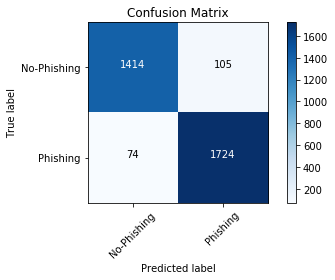

In [154]:
# to plot confusion matrix
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [155]:
tn, fn, fp, tp = cm.ravel()

In [156]:
accy = (tp + tn) / (tn + fn + fp + tp)
eror = (fp + fn) / (tn + fn + fp + tp)
prec = tp / (fp + tp)
rcal = tp / (tp + fn)
sens = tp / (tp + fn)
spec = tn / (tn + fp)
f    = 2 * (prec * rcal) / (prec + rcal)

In [157]:
print(" ::::::::::::::::: Confusion Matrix Statistics ::::::::::::::::: ",)
print("Specificity / True neg rate : ",spec)
print("Senstivity : ",sens)
print("Accuracy : ",accy)
print("Error Rate : ",eror)
print("Precision : ",prec)
print("Recall : ",rcal)
print("F Score : ",f)

 ::::::::::::::::: Confusion Matrix Statistics ::::::::::::::::: 
Specificity / True neg rate :  0.9502688172043011
Senstivity :  0.9425915800984145
Accuracy :  0.9460355743141393
Error Rate :  0.05396442568586072
Precision :  0.9588431590656284
Recall :  0.9425915800984145
F Score :  0.9506479183898539
